# Solution to Exercise DFT 1
---

In [5]:
import numpy as np
import matplotlib.pyplot as plt

### Exercise 1
---
Consider the DFT (with $N$ samples) from the lecture 
$$
c_n = \frac{1}{N}\sum_{k=0}^{N-1}f_k e^{-i\frac{2\pi}{N}nk},\qquad \vec{c} = \frac{1}{N}\mathbf{W}\vec{f}\qquad \mathrm{with}\quad W_{nk} = e^{-i\frac{2\pi}{N}nk}
$$

>(a) Write a python-function dftmtx(N), that returns the transformation-matrix $\mathbf{W}$ for a given number of samples $N$. **Do not use any for loops.** Hint: How can you easily generate a $N\times N$- matrix of the following form?
$$\begin{pmatrix} 0\cdot 0 & 0\cdot 1 & \ldots & 0\cdot (N-1)\\1\cdot 0 & 1\cdot 1 & \ldots & 1\cdot (N-1)\\\vdots  & \vdots & \ddots & \vdots \\(N-1)\cdot 0 &(N-1)\cdot 1 & \ldots & (N-1)\cdot (N-1)\\\end{pmatrix}$$

In [2]:
def dftmtx(N):
    W = 1/N*np.exp(-1j*2*np.pi/N*np.dot(np.arange(N).reshape(N,1),np.arange(N).reshape(1,N)))
    return W

In [ ]:
N = 10000
f = np.random.randn(N).reshape(N,1)
c = np.dot(dftmtx(N),f)
print(c.shape)

>(b) Read in (https://docs.scipy.org/doc/numpy/reference/generated/numpy.loadtxt.html) the signal 'signal_1.dat' ($T=4,f_s=20$, don't forget to properly reshape your signal vector to a (N,1)-array) and determine $\vec{c}$. Plot the spectrum. The signal contains only one single frequency, which one? 

Text(0, 0.5, 's1(t)')

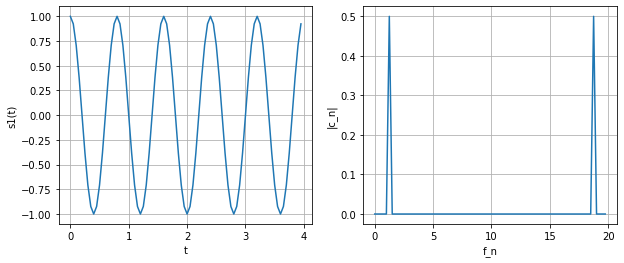

In [3]:
plt.figure(figsize=(10,4))
fs = 20
T = 4
s1 = np.loadtxt('signal_1.dat')
N = s1.size
s1 = s1.reshape(N,1)
c = np.dot(dftmtx(N),s1) 
f = np.arange(0,fs,1/T)
# Plot spectrum
plt.subplot(1,2,2)
plt.plot(f,np.abs(c))
plt.grid()
plt.xlabel('f_n')
plt.ylabel('|c_n|')
# Plot signal
plt.subplot(1,2,1)
t = np.arange(0,T,1/fs)
plt.plot(t,s1)
plt.grid()
plt.xlabel('t')
plt.ylabel('s1(t)')

> (c) Read in the signal 'signal_2.dat' ($T=1,f_s=10^4$) and determine $\vec{c}$. Plot the spectrum.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io.wavfile import write, read
from IPython.display import Audio
# Part(b)
plt.figure(figsize=(10,4))
fs = 10**4
T = 1
s2 = np.loadtxt('signal_2.dat')
write('tmp1.wav',10**4,s2.astype('float32'))

N = s2.size
c = np.dot(dftmtx(N),s2)

f = np.arange(0,fs,1/T)

# Plot spectrum
plt.subplot(1,2,2)
plt.plot(f,np.abs(c))
plt.grid()
plt.xlabel('f_n')
plt.ylabel('|c_n|')

# Plot signal
plt.subplot(1,2,1)
t = np.arange(0,T,1/fs)
plt.plot(t,s2)
plt.grid()
plt.xlabel('t')
plt.ylabel('s1(t)')

In [ ]:
from ipywebrtc import AudioRecorder, CameraStream
import torchaudio
from IPython.display import Audio

sig, sr = torchaudio.load("tmp1.wav")
Audio(data=sig, rate=sr)

> (d) Consider a signal of the following form
$$
f(t) = c_1\cos(2\pi f_1 t + \varphi_1) + c_2\cos(2\pi f_2 t + \varphi_2)
$$
Use  $T=1$ and $f_s = 100$Hz. Write a python function analyse\_signal($c_1,c_2,f_1,f_2,\varphi_1,\varphi_2$), that plots the signal together with its Fourier spectrum. Use two plots for the spectrum: (1) In the first one plot $|c_n|$, (2) in the second one plot the real and imaginary part seperately.  Try different values for $c_1,c_2,f_1,f_2,\varphi_1,\varphi_2$ and check how the Fourier spectrum changes accordingly.

In [4]:
# Signal Parameter
def analyse_signal(c_1, c_2, f_1, f_2, phi_1, phi_2):
    T, f_s =  1, 100
    N= f_s*T

    t = np.arange(0,T,1/f_s)
    f = c_1*np.cos(2*np.pi*f_1*t+phi_1) + c_2*np.cos(2*np.pi*f_2*t+phi_2)

    c = np.dot(dftmtx(N),f.reshape(N,1)).reshape(-1)
    c = np.hstack((c[np.int(N/2):],c[:np.int(N/2)]))
    print(c.shape)
    freq = np.arange(-f_s/2,f_s/2,1/T)

    
    plt.figure(figsize=(15,5))
    plt.subplot(1,3,1)
    plt.plot(t,f)
    plt.grid()

    plt.subplot(1,3,2)
    plt.plot(freq, np.abs(c),label='abs(c)')
    plt.vlines(0.0,-1.0,1.0,linestyles='--')
    plt.axis([-f_s/2,f_s/2,-1,1])
    plt.xticks(np.arange(-f_s/2,f_s/2,10))
    plt.legend()
    plt.grid()

    plt.subplot(1,3,3)
    plt.plot(freq, c.real,'g',label='real(c)')
    plt.plot(freq, c.imag,'r-',label='imag(c)')
    plt.vlines(0.0,-1.0,1.0,linestyles='--')
    plt.axis([-f_s/2,f_s/2,-1,1])
    plt.xticks(np.arange(-f_s/2,f_s/2,10))

    plt.legend()
    plt.grid()

In [ ]:
analyse_signal(2, 1, 5, 10, 0, 0.5)

In [5]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

c_1 = widgets.FloatSlider(min=0, max=2, step=0.1, value=1)
c_2 = widgets.FloatSlider(min=0, max=2, step=0.1, value=0)
f_1 = widgets.FloatSlider(min=0, max=20, step=1, value=5)
f_2 = widgets.FloatSlider(min=0, max=20, step=1, value=10)
phi_1 = widgets.FloatSlider(min=0, max=np.pi, step=np.pi/8, value=0)
phi_2 = widgets.FloatSlider(min=0, max=np.pi, step=np.pi/8, value=0)

ui = widgets.HBox([c_1, c_2, f_1, f_2, phi_1, phi_2])
out = widgets.interactive_output(analyse_signal, {'c_1': c_1, 
                                                  'c_2': c_2, 
                                                  'f_1' : f_1, 
                                                  'f_2' : f_2, 
                                                  'phi_1' : phi_1, 
                                                  'phi_2' : phi_2} )

display(out, ui)

Output()

### Record real Audio

In [23]:
from ipywebrtc import AudioRecorder, CameraStream
import torchaudio
from IPython.display import Audio

camera = CameraStream(constraints={'audio': True,'video':False})
recorder = AudioRecorder(stream=camera)
recorder

AudioRecorder(audio=Audio(value=b'', format='webm'), stream=CameraStream(constraints={'audio': True, 'video': …

In [24]:
with open('recording.webm', 'wb') as f:
    f.write(recorder.audio.value)
!ffmpeg -i recording.webm -ac 1 -f wav file.wav -y -hide_banner -loglevel panic
sig, sr = torchaudio.load("file.wav")
print(sr)
Audio(data=sig, rate=sr)

48000


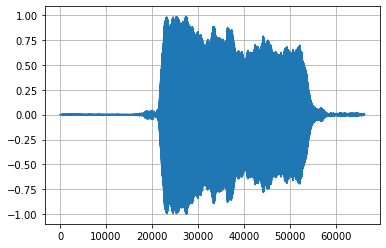

In [25]:
sig = sig.reshape(-1)
t = np.arange(0,np.array(sig.tolist()).size/sr,1/sr)
plt.plot(np.array(sig.tolist()))
plt.grid()

Text(0.5, 0, 'f_n')

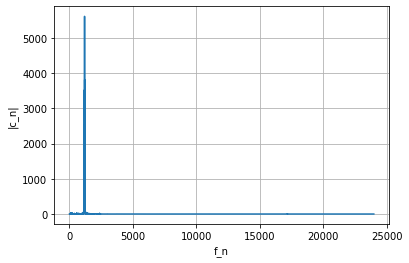

In [26]:
sig = sig.reshape(-1)
T = np.array(sig.tolist()).size/sr
N = np.array(sig.tolist()).size
c = np.fft.fft(np.array(sig.tolist()))
f = np.arange(0,sr,1/T)
plt.plot(f[f<24000],np.abs(c)[f<24000])
#plt.plot(f,np.abs(c))
#plt.plot(f,np.abs(c))
plt.grid()
plt.ylabel('|c_n|')
plt.xlabel('f_n')

### Exercise 2

A signal $f(t)$ of period $T=4$s is sampled. You are given the complex Fourier coefficents $c_n$ for $0\leq n\leq \frac{N}{2}$. These coefficients are stored in the file fourier\_coeff.dat. To read in use np.loadtxt (https://numpy.org/doc/stable/reference/generated/numpy.loadtxt.html) with dtype=complex.

(a) Determine the sampling frequency $f_s$.

(b) Using the symmetry of the Fouier coefficients: Determine $c_n$ for $n=0,1,\ldots,N-1$.

(c) Reconstruct and plot the signal using the DFT.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

################
# Your code here
################
T = 4
c = np.loadtxt('fourier_coeff.dat',dtype='complex')
N = (c.size-1)*2
f_s = N/T
c = c.reshape(c.size,1)
c = np.vstack((c,np.conj(np.flip(c[1:-1]))))
f = 1/N *np.dot(np.conj(dftmtx(N).T),c)
t = np.arange(0,T,1/f_s)
plt.plot(t,f)
plt.grid()
plt.xlabel('t')
plt.ylabel('f(t)')
plt.show()